In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns
%config InlineBackend.figure_format='retina'

PROC_DATA_PATH = '~/library/data/processed/'

In [2]:
# Load in the data
df = pd.read_csv(PROC_DATA_PATH + 'borough-unemployment-and-business-data.csv', index_col=0)


In [3]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df.iloc[:,3:])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



([<matplotlib.axis.XTick at 0x7f9e10193780>,
 <a list of 5 Text xticklabel objects>)

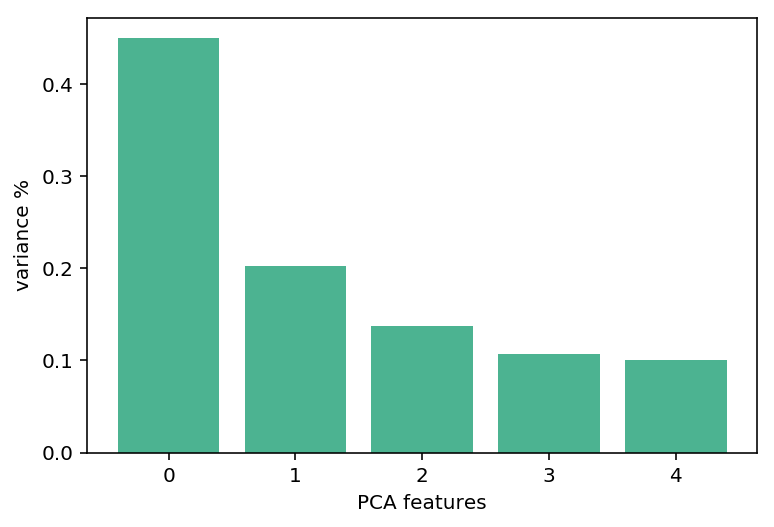

In [4]:
# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances to identify no of needed PCs
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='#4CB391')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [5]:
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

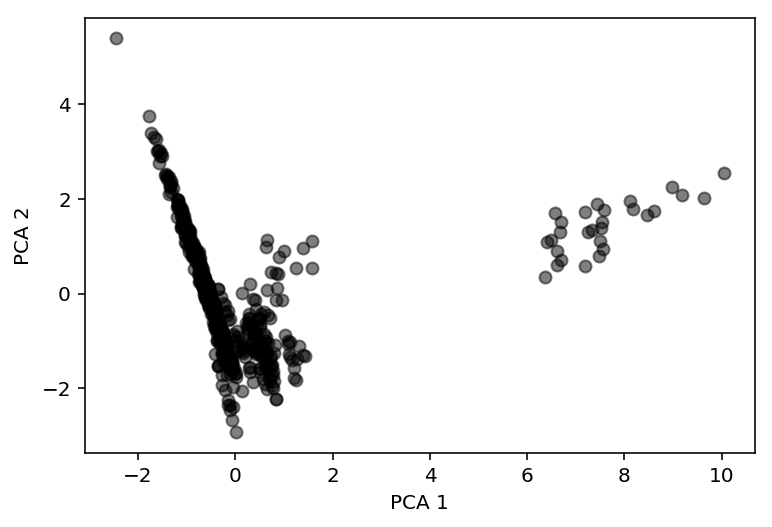

In [6]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, c='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

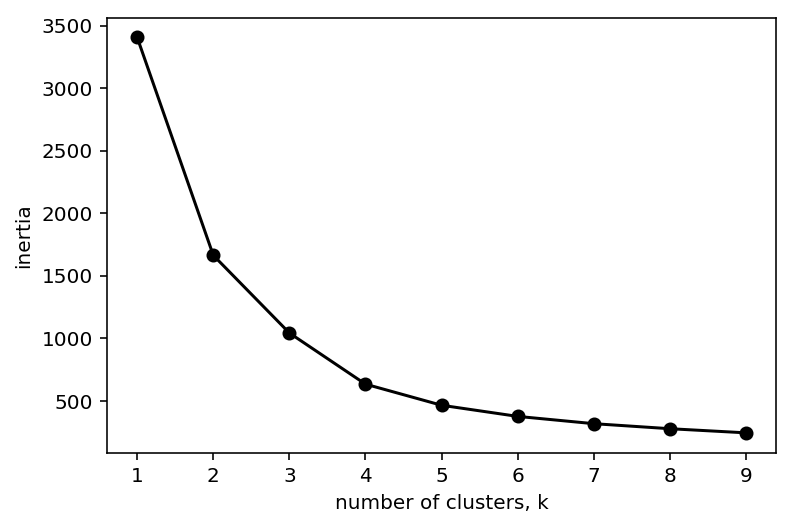

In [7]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

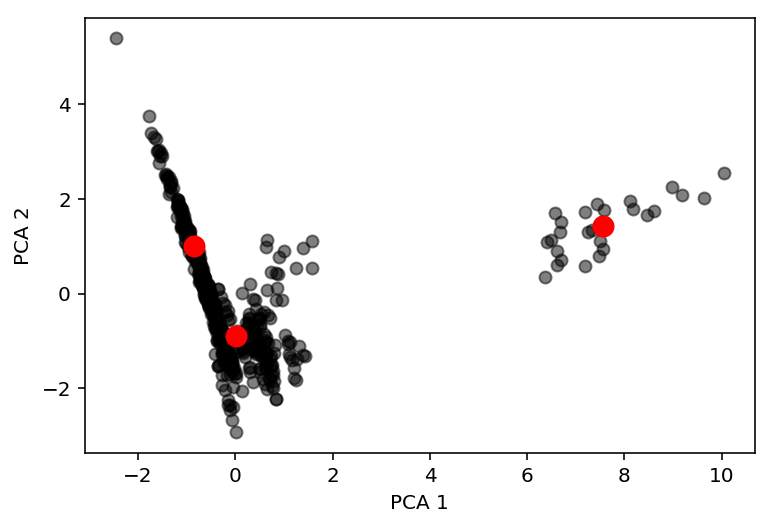

In [8]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = model.fit_predict(PCA_components.iloc[:,:3])
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, c='black')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [9]:
model.labels_

array([0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,

In [10]:
df['group'] = model.labels_

In [11]:
df[df['group'] == 2]

,area,code,active_enterprises,births,birth_rate,deaths,death_rate,number_of_jobs,job_density,unemployment_rate,group
year,,,,,,,,,,,
2004,Bexley,E09000004,6450,940,14.6,800,12.4,85000,0.61,4.1,2
2004,Bromley,E09000006,11655,1590,13.6,1375,11.8,126000,0.67,4.7,2
2004,Camden,E09000007,22910,2840,12.4,2775,12.1,278000,1.82,7.6,2
2004,Havering,E09000016,7570,1055,13.9,920,12.2,92000,0.65,4.0,2
2004,Hillingdon,E09000017,9170,1215,13.2,1130,12.3,196000,1.20,5.1,2
2004,Kensington and Chelsea,E09000020,11675,1660,14.2,1445,12.4,131000,1.09,6.0,2
2004,Kingston upon Thames,E09000021,6680,880,13.2,885,13.2,84000,0.81,4.3,2
2004,Richmond upon Thames,E09000027,10855,1475,13.6,1220,11.2,82000,0.66,4.3,2
2004,Sutton,E09000029,6485,855,13.2,780,12.0,73000,0.62,4.6,2


In [18]:
fig = px.scatter_matrix(df, dimensions=['youth_unemployment_rate','3_year_survival_rate','job_density', 'NVQ4_rate', 'no_qualif_rate'], color="group")
fig.show()

ValueError: Value of 'dimensions_3' is not the name of a column in 'data_frame'. Expected one of ['area', 'code', 'active_enterprises', 'births', 'birth_rate', 'deaths', 'death_rate', 'number_of_jobs', 'job_density', 'unemployment_rate', 'group'] but received: NVQ4_rate